In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pca import pca
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/data/processed /data_clean.csv', index_col=False)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


Splitting the dataset

In [3]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis'].map(lambda x: 1 if x == 'M' else 0)

In [4]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
28,852973,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,...,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.63350,0.20240,0.4027,0.09876
173,871641,11.08,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,0.1566,...,11.35,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313
62,858986,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,...,17.67,29.51,119.10,959.5,0.1640,0.6247,0.69220,0.17850,0.2844,0.11320
118,864877,15.78,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.09479,0.2096,...,20.19,30.50,130.30,1272.0,0.1855,0.4925,0.73560,0.20340,0.3274,0.12520
453,911201,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,922297,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492
348,898690,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,...,12.51,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763
549,923465,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,...,13.03,31.45,83.90,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626
36,854268,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,...,15.89,30.36,116.20,799.6,0.1446,0.4238,0.51860,0.14470,0.3591,0.10140


In [8]:
X_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
473,9113846,12.270,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
254,886226,19.450,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.08591,0.1776,...,25.70,24.57,163.10,1972.0,0.14970,0.31610,0.43170,0.19990,0.3379,0.08950
554,924632,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242
303,892657,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,...,11.06,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842
264,889719,17.190,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,...,21.58,29.33,140.50,1436.0,0.15580,0.25670,0.38890,0.19840,0.3216,0.07570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,87127,10.800,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
543,922296,13.210,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.03275,0.1628,...,14.37,37.17,92.48,629.6,0.10720,0.13810,0.10620,0.07958,0.2473,0.06443
127,866203,19.000,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,...,22.32,25.73,148.20,1538.0,0.10210,0.22640,0.32070,0.12180,0.2841,0.06541
512,915691,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090


In [9]:
y_train

28     1
173    0
62     1
118    1
453    0
      ..
544    0
348    0
549    0
36     1
488    0
Name: diagnosis, Length: 455, dtype: int64

Scaling  data

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train

array([[-0.24497121,  0.36246248,  1.39827643, ...,  1.38516288,
         1.87443223,  0.82690705],
       [-0.24483072, -0.82212519, -1.05361897, ..., -1.06502931,
        -1.63616374, -0.60380306],
       [-0.24492596,  0.0677191 ,  0.67385279, ...,  1.01764943,
        -0.0799372 ,  1.63297236],
       ...,
       [-0.2444407 , -0.89510926,  1.15215814, ..., -1.22525903,
         0.27525251, -0.42908115],
       [-0.24496147,  0.0677191 ,  0.57401235, ...,  0.49790237,
         1.15414054,  0.97427633],
       [-0.2445156 , -0.6537004 , -0.71462586, ..., -0.21790312,
        -0.14601901, -0.20691079]])

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 31), (455,), (114, 31), (114,))

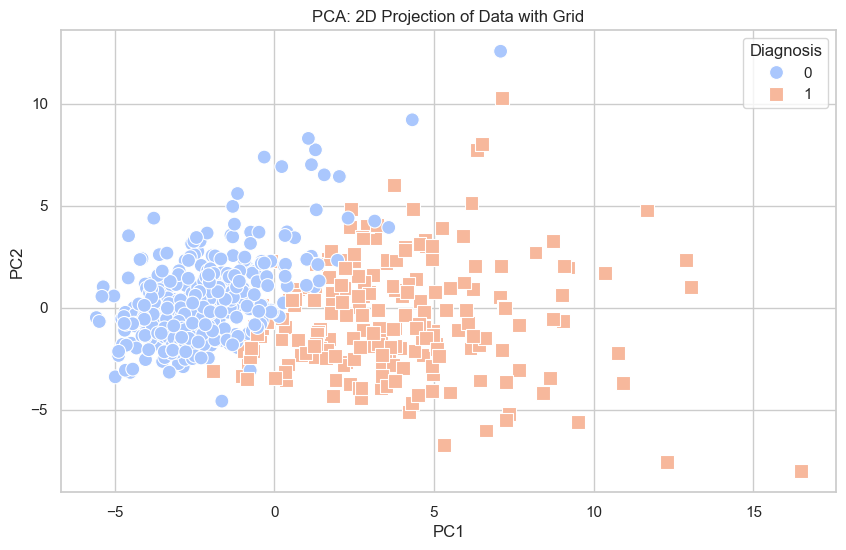

In [77]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components and the target variable
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y

# Visualize the data in 2D using PCA components with grid
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette='coolwarm', style='Diagnosis', markers=['o', 's'], s=100)
plt.title('PCA: 2D Projection of Data with Grid')
plt.grid(True)
plt.show()

Model

In [13]:
import pandas as pd

# Create an empty DataFrame
model_comparison = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'F1 Score', 'Recall', 'Precision'])
model_comparison

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision


Logistic Regression

In [14]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_pred=LR.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.98      0.94      0.96        51

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9649122807017544
F1 Score: 0.96
Recall: 0.9411764705882353
Precision: 0.9795918367346939


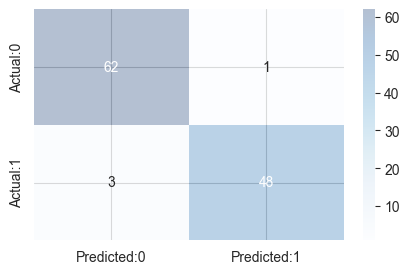

In [16]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics
train_acc = LR.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
recal = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[0]=['Logistic Regression', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= plt.cm.Blues, alpha=0.3)
plt.show()

Support Vector Machine

In [17]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [18]:
y_pred=svm.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.98      0.99        51

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Training Accuracy: 0.9846153846153847
Testing Accuracy: 0.9912280701754386
F1 Score: 0.99009900990099
Recall: 0.9803921568627451
Precision: 1.0


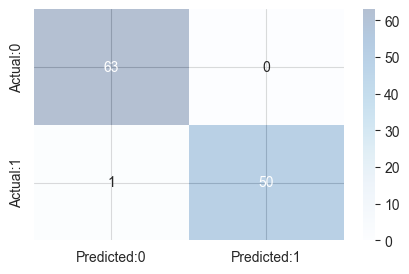

In [19]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics
train_acc = svm.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)


model_comparison.loc[1]=['Support Vector Machine', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with blue colormap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [21]:
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       1.00      0.96      0.98        51

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Training Accuracy: 0.9714285714285714
Testing Accuracy: 0.9824561403508771
F1 Score: 0.98
Recall: 0.9607843137254902
Precision: 1.0


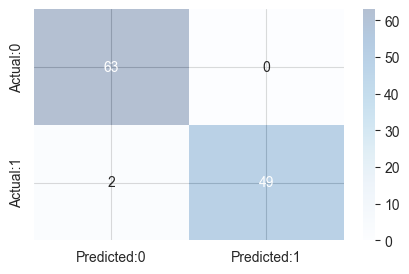

In [22]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics
train_acc = knn.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[2]=['KNN', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with blue colormap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Naives Bayes

In [23]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [24]:
y_pred=NB.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        63
           1       1.00      0.92      0.96        51

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Training Accuracy: 0.9406593406593406
Testing Accuracy: 0.9649122807017544
F1 Score: 0.9591836734693878
Recall: 0.9215686274509803
Precision: 1.0


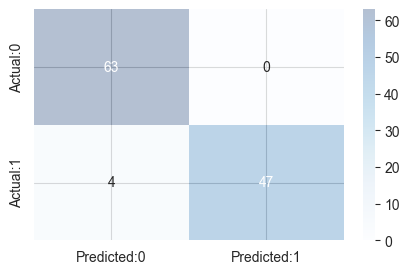

In [25]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Naive Bayes (NB) model
train_acc = NB.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Naive Bayes (NB) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[3]=['Gaussian Naives Bayes', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=8)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=8)

In [27]:
y_pred=DT.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.98      0.92      0.95        51

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114

Training Accuracy: 1.0
Testing Accuracy: 0.956140350877193
F1 Score: 0.9494949494949494
Recall: 0.9215686274509803
Precision: 0.9791666666666666


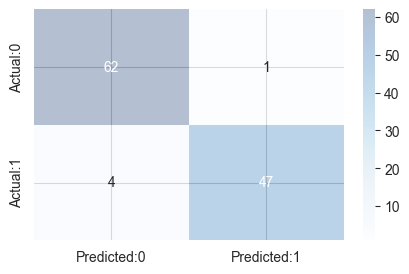

In [28]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Decision Tree (DT) model
train_acc = DT.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Decision Tree (DT) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[4]=['Decision Tree', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with blue color
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap with blue color
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RF=RandomForestClassifier(n_estimators=50,random_state=1)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [30]:
y_pred=RF.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        63
           1       1.00      0.92      0.96        51

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Training Accuracy: 1.0
Testing Accuracy: 0.9649122807017544
F1 Score: 0.9591836734693878
Recall: 0.9215686274509803
Precision: 1.0


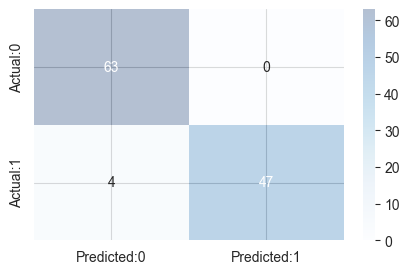

In [31]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Random Forest (RF) model
train_acc = RF.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Random Forest (RF) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[5]=['Random forest', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap without specifying color (default color)
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap without specifying color (default color)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Gradient Boosting

In [32]:
GB=GradientBoostingClassifier(n_estimators=12)
GB.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=12)

In [33]:
y_pred=GB.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        63
           1       1.00      0.90      0.95        51

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114

Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.956140350877193
F1 Score: 0.9484536082474228
Recall: 0.9019607843137255
Precision: 1.0


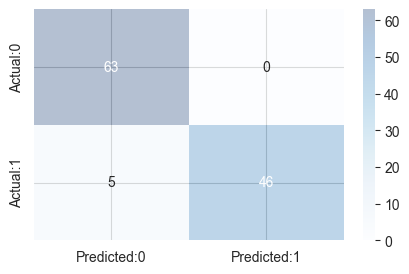

In [34]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for Gradient Boosting (GB) model
train_acc = GB.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for Gradient Boosting (GB) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[6]=['Gradient Boosting', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap with specified color (blue)
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap with specified color (blue)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()


XGBoost

In [35]:
from xgboost.sklearn import XGBClassifier
XGB= XGBClassifier(random_state=0,n_estimators=88,booster='gbtree')
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=88, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [36]:
y_pred=XGB.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0])

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.98      1.00      0.99        51

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Training Accuracy: 1.0
Testing Accuracy: 0.9912280701754386
F1 Score: 0.9902912621359222
Recall: 1.0
Precision: 0.9807692307692307


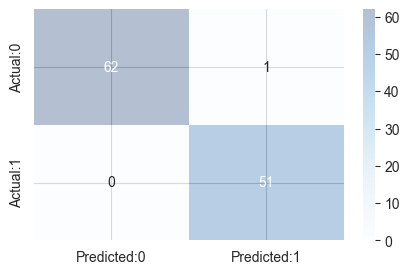

In [37]:
# Display classification report
print(classification_report(y_test, y_pred))

# Calculate and display metrics for XGBoost (XGB) model
train_acc = XGB.score(X_train, y_train)  # Training accuracy
test_acc = accuracy_score(y_test, y_pred)  # Testing accuracy
recal = recall_score(y_test, y_pred)  # Recall
prec = precision_score(y_test, y_pred)  # Precision
f1 = f1_score(y_test, y_pred)  # F1 score

# Print performance metrics for XGBoost (XGB) model
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score:", f1)
print("Recall:", recal)
print("Precision:", prec)

model_comparison.loc[8]=['XGBoost', train_acc, test_acc, f1, recal, prec]

# Create a confusion matrix and display it using seaborn heatmap without specifying color
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix heatmap without specifying color
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.show()

Neural Network

In [38]:
import tensorflow as tf
from tensorflow import keras

# Define a sequential model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(31,)),  # Flatten layer for input shape (30,)
    keras.layers.Dense(100, activation='relu'),  # Dense layer with 100 units and ReLU activation
    keras.layers.Dense(2, activation='sigmoid')  # Dense layer with 2 units and sigmoid activation
])

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()


2023-12-13 10:38:44.103861: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 31)                0         
                                                                 
 dense (Dense)               (None, 100)               3200      
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 3402 (13.29 KB)
Trainable params: 3402 (13.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,shuffle=True)

Epoch 1/20
13/13 [==============================] - 1s 17ms/step - loss: 0.5088 - accuracy: 0.7433 - val_loss: 0.2559 - val_accuracy: 0.9783
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.2419 - accuracy: 0.9218 - val_loss: 0.1529 - val_accuracy: 1.0000
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1719 - accuracy: 0.9438 - val_loss: 0.1204 - val_accuracy: 1.0000
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1417 - accuracy: 0.9535 - val_loss: 0.1026 - val_accuracy: 1.0000
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.9609 - val_loss: 0.0916 - val_accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1108 - accuracy: 0.9707 - val_loss: 0.0810 - val_accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1011 - accuracy: 0.9756 - val_loss: 0.0761 - val_accuracy: 1.0000
Epoch 8/20
13/13 [=

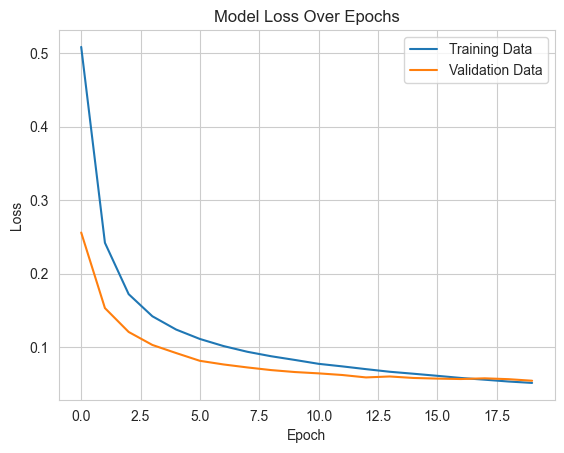

In [40]:
# Plotting the training loss and validation loss over epochs
plt.plot(history.history['loss'])         # Plot training loss
plt.plot(history.history['val_loss'])     # Plot validation loss

# Adding title and labels to the plot
plt.title('Model Loss Over Epochs')       # Set the title of the plot
plt.ylabel('Loss')                        # Label for the y-axis
plt.xlabel('Epoch')                       # Label for the x-axis

# Adding a legend to differentiate between training and validation loss
plt.legend(['Training Data', 'Validation Data'], loc='upper right')  # Specify legend labels and position

# Display the plot
plt.show()


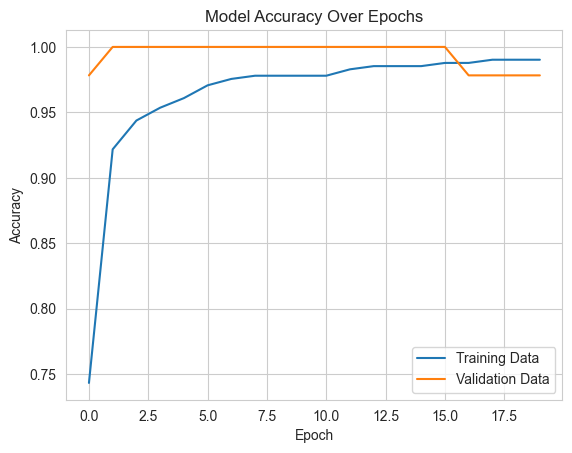

In [41]:
# Plotting the training accuracy and validation accuracy over epochs
plt.plot(history.history['accuracy'])         # Plot training accuracy
plt.plot(history.history['val_accuracy'])     # Plot validation accuracy

# Adding title and labels to the plot
plt.title('Model Accuracy Over Epochs')       # Set the title of the plot
plt.ylabel('Accuracy')                        # Label for the y-axis
plt.xlabel('Epoch')                           # Label for the x-axis

# Adding a legend to differentiate between training and validation accuracy
plt.legend(['Training Data', 'Validation Data'], loc='lower right')  # Specify legend labels and position

# Display the plot
plt.show()


In [42]:
loss, accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9825


In [43]:
X_test[0]

array([-0.18280092, -0.48808269,  2.48955563, -0.55891611, -0.50513626,
       -1.35401825, -1.32184512, -1.09116862, -1.22822527, -0.38911857,
       -0.47526283,  0.17008493,  4.35488798,  0.03051491, -0.08883248,
        0.07381628, -0.97524678, -1.01798723, -1.88071957,  1.34732171,
       -0.24945148, -0.5483175 ,  2.03629201, -0.62322677, -0.53612469,
       -1.64776993, -1.28726424, -1.28985481, -1.72716861, -0.79857685,
       -0.92198674])

In [44]:
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 0s 1ms/step


array([[9.62098598e-01, 1.21763453e-01],
       [3.13791749e-03, 9.92385507e-01],
       [8.23344409e-01, 2.64902741e-01],
       [9.86859441e-01, 1.96614787e-02],
       [1.99715737e-02, 9.76145029e-01],
       [9.05142605e-01, 1.24308854e-01],
       [9.83763874e-01, 3.24720070e-02],
       [9.75748777e-01, 4.02671285e-02],
       [1.85882688e-01, 8.24934542e-01],
       [9.79214013e-01, 4.12276350e-02],
       [9.87821758e-01, 1.65068060e-02],
       [1.99174369e-03, 9.87480700e-01],
       [1.28997286e-04, 9.99329090e-01],
       [9.87350583e-01, 2.07914580e-02],
       [2.16276646e-01, 8.61971200e-01],
       [2.43220711e-03, 9.83389378e-01],
       [1.36956095e-03, 9.88033652e-01],
       [6.68742180e-01, 5.06836236e-01],
       [4.24677432e-02, 9.07272100e-01],
       [7.12374523e-02, 7.95984924e-01],
       [9.94860590e-01, 1.65196210e-02],
       [9.53072250e-01, 6.04797155e-02],
       [3.68946530e-05, 9.99856174e-01],
       [8.33010137e-01, 2.13724390e-01],
       [9.776440

In [45]:
y_pred[0]

array([0.9620986 , 0.12176345], dtype=float32)

In [46]:
np.argmax(y_pred[0])

0

In [47]:
y_test[:1]

473    0
Name: diagnosis, dtype: int64

In [48]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0]

In [49]:
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       1.00      0.96      0.98        51

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [50]:
accuracy

0.9824561476707458

In [51]:
metric = tf.keras.metrics.Recall()
metric.update_state(y_test, y_pred_labels)
print("Recall =",metric.result().numpy())

Recall = 0.9607843


In [52]:
m = tf.keras.metrics.Precision()
m.update_state(y_test, y_pred_labels)
print("Precision =",m.result().numpy())

Precision = 1.0


In [53]:
y_pred_train_labels=[np.argmax(i) for i in model.predict(X_train)]
y_pred_train_labels

15/15 [==============================] - 0s 1ms/step


[1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


Training Accuracy : 0.989010989010989
Testing Accuracy : 0.9824561403508771
F1 Score : 0.98
Recall : 0.9607843137254902
Precision : 1.0


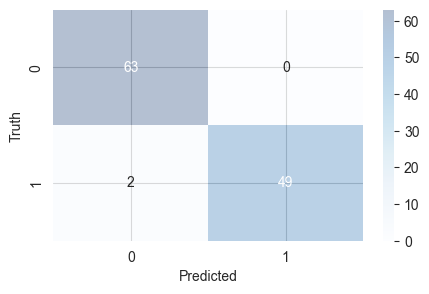

In [54]:
train_acc=accuracy_score(y_train,y_pred_train_labels)
test_acc=accuracy_score(y_test,y_pred_labels)
recal=recall_score(y_test,y_pred_labels)
prec=precision_score(y_test,y_pred_labels)
f1=f1_score(y_test,y_pred_labels)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)
model_comparison.loc[10]=['Neural Network', train_acc, test_acc, f1, recal, prec]
cm = tf.math.confusion_matrix(y_test,y_pred_labels)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, alpha=0.3)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Model Selection

In [55]:
model_comparison

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.986813,0.964912,0.960000,0.941176,0.979592
1,Support Vector Machine,0.984615,0.991228,0.990099,0.980392,1.000000
2,KNN,0.971429,0.982456,0.980000,0.960784,1.000000
3,Gaussian Naives Bayes,0.940659,0.964912,0.959184,0.921569,1.000000
4,Decision Tree,1.000000,0.956140,0.949495,0.921569,0.979167
5,Random forest,1.000000,0.964912,0.959184,0.921569,1.000000
6,Gradient Boosting,0.986813,0.956140,0.948454,0.901961,1.000000
8,XGBoost,1.000000,0.991228,0.990291,1.000000,0.980769
10,Neural Network,0.989011,0.982456,0.980000,0.960784,1.000000


/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_991/29036476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Training Accuracy', palette="Blues")


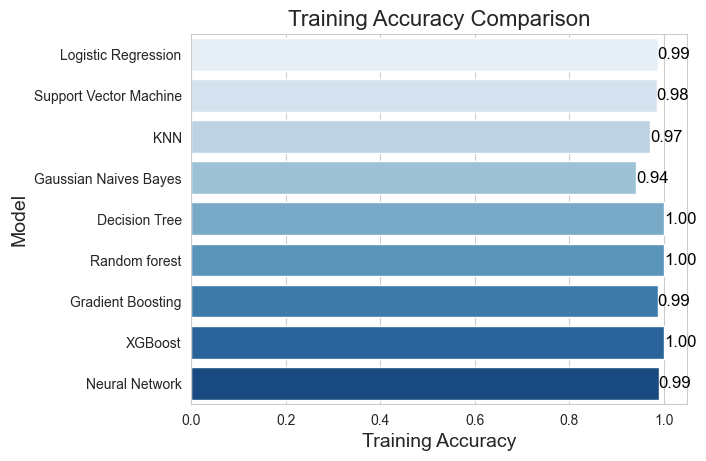

In [56]:
ax=sns.barplot(data=model_comparison,y='Model',x='Training Accuracy')
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Training Accuracy', palette="Blues")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Training Accuracy']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Training Accuracy Comparison', fontsize=16)
plt.xlabel('Training Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_991/825708878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Testing Accuracy', palette="Blues_r")


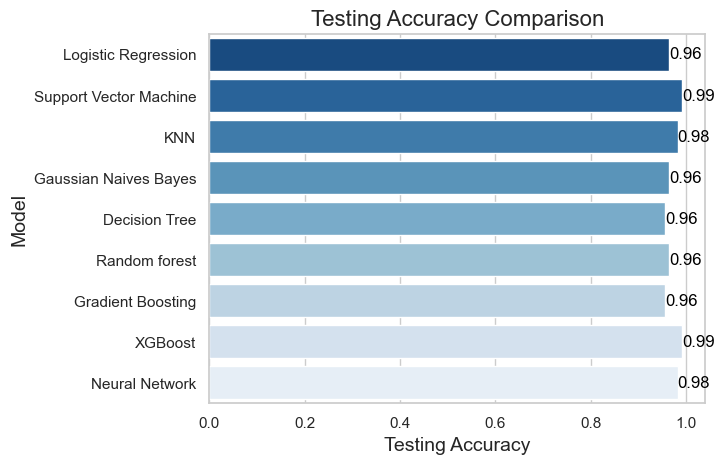

In [57]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Testing Accuracy', palette="Blues_r")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Testing Accuracy']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Testing Accuracy Comparison', fontsize=16)
plt.xlabel('Testing Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_991/72442067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='F1 Score', palette="Greens_r")


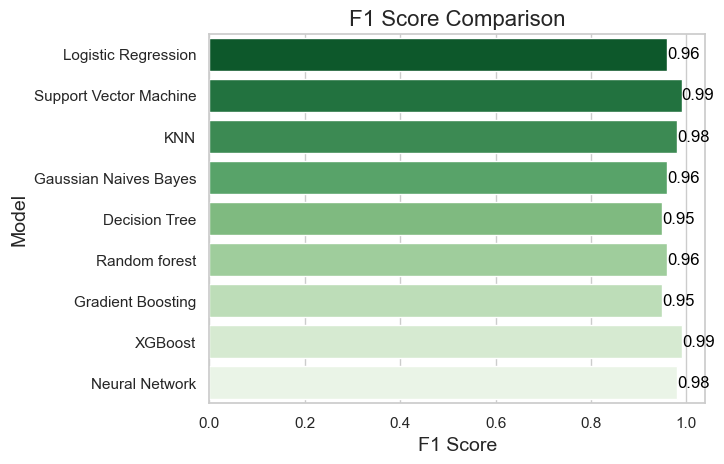

In [58]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='F1 Score', palette="Greens_r")

# Annotate the bars with values
for index, value in enumerate(model_comparison['F1 Score']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('F1 Score Comparison', fontsize=16)
plt.xlabel('F1 Score', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_991/3290121775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Precision', palette="Blues")


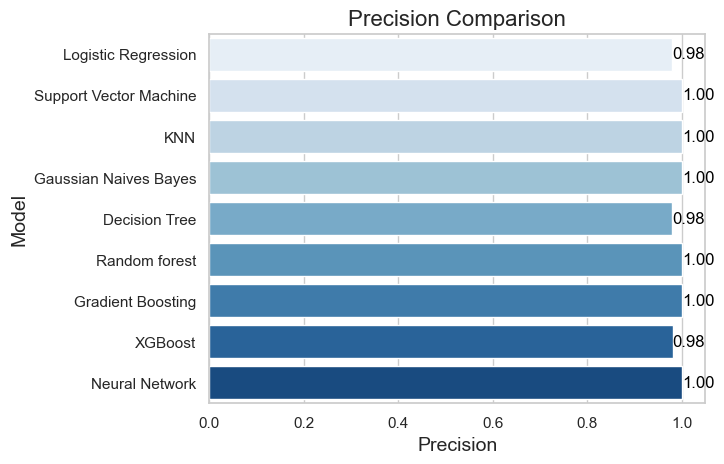

In [59]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Precision', palette="Blues")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Precision']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Precision Comparison', fontsize=16)
plt.xlabel('Precision', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_991/3397842002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=model_comparison, y='Model', x='Recall', palette="Greens")


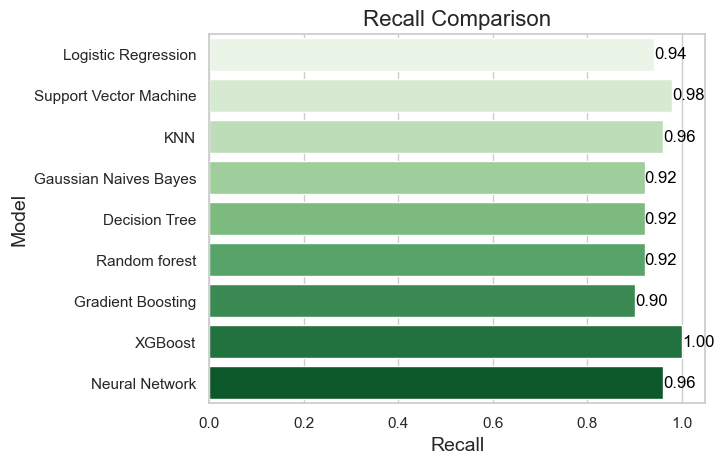

In [60]:
# Set the style
sns.set_theme(style="whitegrid")

# Bar plot
ax = sns.barplot(data=model_comparison, y='Model', x='Recall', palette="Greens")

# Annotate the bars with values
for index, value in enumerate(model_comparison['Recall']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=12)

plt.title('Recall Comparison', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

Error analysis- cross validation

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))


# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('\n➔ 10-Fold cross-validation accurcay score for the training data for six classifiers')

LR: 0.975845 (0.024928)
SVM: 0.973720 (0.021361)
KNN: 0.958164 (0.025294)
NB: 0.929710 (0.041513)
CART: 0.914300 (0.040001)
RF: 0.956087 (0.029496)
GB: 0.960435 (0.019224)
XGB: 0.967053 (0.024417)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers


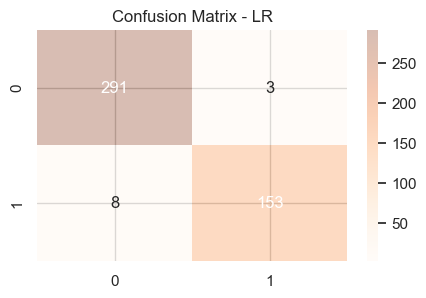

Classification Report - LR:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       294
           1       0.98      0.95      0.97       161

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455


LR: 0.98 (455)


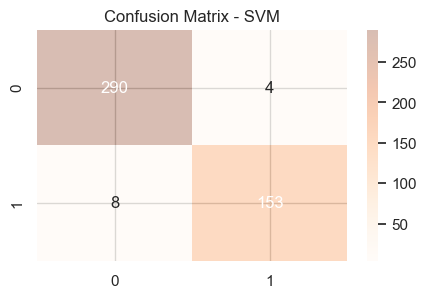

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       294
           1       0.97      0.95      0.96       161

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455


SVM: 0.97 (455)


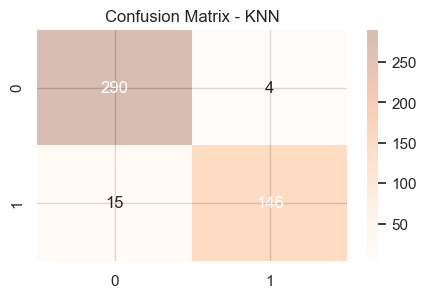

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       294
           1       0.97      0.91      0.94       161

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455


KNN: 0.96 (455)


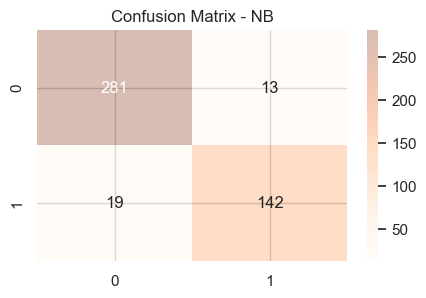

Classification Report - NB:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       294
           1       0.92      0.88      0.90       161

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.92       455
weighted avg       0.93      0.93      0.93       455


NB: 0.93 (455)


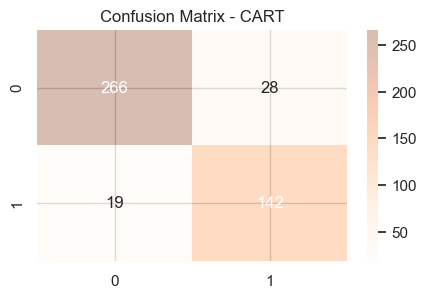

Classification Report - CART:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       294
           1       0.84      0.88      0.86       161

    accuracy                           0.90       455
   macro avg       0.88      0.89      0.89       455
weighted avg       0.90      0.90      0.90       455


CART: 0.90 (455)


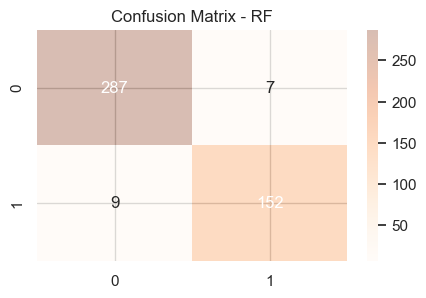

Classification Report - RF:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       294
           1       0.96      0.94      0.95       161

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455


RF: 0.96 (455)


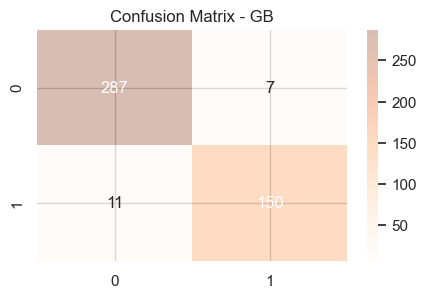

Classification Report - GB:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       294
           1       0.96      0.93      0.94       161

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455


GB: 0.96 (455)


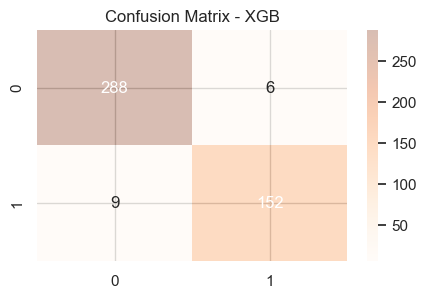

Classification Report - XGB:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       294
           1       0.96      0.94      0.95       161

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.96       455
weighted avg       0.97      0.97      0.97       455


XGB: 0.97 (455)

➔ 10-Fold cross-validation accuracy score for the training data for six classifiers

Feature importance not available for this model.


<Figure size 1000x600 with 0 Axes>

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Spot-Check Algorithms
models = [
    ('LR', LogisticRegression()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('NB', GaussianNB()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('GB', GradientBoostingClassifier()),
    ('XGB', XGBClassifier())
]

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # Cross-validation predictions
    y_pred = cross_val_predict(model, X_train, y_train, cv=kfold)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_train, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', alpha=0.3)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Classification Report
    class_report = classification_report(y_train, y_pred)
    print(f'Classification Report - {name}:\n{class_report}\n')

    # Store results for later comparison
    results.append(class_report)
    names.append(name)

    msg = f"{name}: {class_report.split()[-2]} ({class_report.split()[-1]})"
    print(msg)

print('\n➔ 10-Fold cross-validation accuracy score for the training data for six classifiers')

# Visualize Feature Importance for one of the models (e.g., Logistic Regression)
# Assuming LR is the first model in the list
lr_model = models[0][1]
lr_model.fit(X_train, y_train)

# Feature Importance Visualization
try:
    feature_importance = lr_model.coef_[0]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=X_train.columns)
    plt.title('Feature Importance - Logistic Regression')
    plt.show()
except AttributeError:
    print("\nFeature importance not available for this model.")


In [63]:
model = model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Extract false positives (FP), false negatives (FN), etc.
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Display error analysis metrics
print("\nError Analysis Metrics:")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")

# Feature importance (if applicable to your model type)
try:
    feature_importance = model.coef_[0]  # Replace with your actual feature importance extraction method
    print("\nFeature Importance:")
    for feature, importance in zip(X.columns, feature_importance):
        print(f"{feature}: {importance}")
except AttributeError:
    print("\nFeature importance not available for this model.")

Confusion Matrix:
[[62  1]
 [ 0 51]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.98      1.00      0.99        51

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Error Analysis Metrics:
False Positives (FP): 1
False Negatives (FN): 0
True Positives (TP): 51
True Negatives (TN): 62

Feature importance not available for this model.


Prediction

In [64]:
# Replace these placeholders with your actual neural network model, List_col, and patient_data
neural_network_model = model  # Replace with your actual neural network model
List_col = ['id'] + list(df.columns[1:])  # Replace with your actual list of columns
patient_data = '/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/data/processed /data_clean.csv'  # Replace with your actual patient data

# Assuming you have loaded your data and performed train-test split, and you have X_train and X_test
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'scaler' is a StandardScaler object used during training
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Assuming 'pca' is a PCA object used during training
pca = PCA(n_components=31)  # Adjust the number of components as needed

# Fit and transform the PCA on the scaled training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the same PCA
X_test_pca = pca.transform(X_test_scaled)

def predict_cancer(input_data):
    # Scale and transform the input data using the trained scaler and PCA
    df = pd.DataFrame([input_data], columns=List_col[1:])  # Create a DataFrame with input data
    df_scaled = scaler.transform(df)  # Scale the input data using the trained scaler
    df_pca = pca.transform(df_scaled)  # Transform using the trained PCA

    # Ensure that df_pca has the same number of features as the model expects
    if df_pca.shape[1] != X_train_pca.shape[1]:
        raise ValueError(f"Number of features in input data ({df_pca.shape[1]}) does not match the model ({X_train_pca.shape[1]})")

    prediction = neural_network_model.predict(df_pca)
    prediction_label = np.argmax(prediction)
    return 'The tumor is Malignant (cancerous)' if prediction_label == 1 else 'The tumor is Benign (non-cancerous)'

# Example usage:
# Assuming X_test_pca[0] represents a single row of your test data
result = predict_cancer(X_test_pca[0])
print('PREDICTION:', result)



PREDICTION: The tumor is Benign (non-cancerous)


/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/venv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [72]:
def predict_cancer(input_data):
    df = scaler.transform(np.array([input_data]))
    prediction = model.predict(df)
    prediction_label = np.argmax(prediction)
    return 'The tumor is Malignant (cancerous)' if prediction_label == 1 else 'The tumor is Benign (non-cancerous)'

List_col = [col for col in X.columns]
print(List_col)
print('----------------------------------------------------------------------------------------------------------------------')
print('\t\t\t\t *** BREAST CANCER PREDICTION SYSTEM ***')
print('----------------------------------------------------------------------------------------------------------------------')

# Ensure that the patient_data includes all 31 features
# Ensure that the patient_data includes all 31 features
patient_data = []

for col in List_col:
    val = int(input('Enter the {}:'.format(col))) if col == 'id' else float(input('Enter the {}:'.format(col)))
    patient_data.append(val)

# Pass all features to predict_cancer
result = predict_cancer(patient_data)
print('PREDICTION :', end=' ')
print(result)
print('----------------------------------------------------------------------------------------------------------------------')


['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
----------------------------------------------------------------------------------------------------------------------
				 *** BREAST CANCER PREDICTION SYSTEM ***
----------------------------------------------------------------------------------------------------------------------
PREDICTION : The tumor is Benign (non-cancerous)
--------------------------------------------------------------------------------------------------------------------

In [73]:
# Given values
input_data = [858986,14.25,22.15,96.42,645.7,0.1049,0.2008,0.2135,0.08653,0.1949,0.07292,0.7036,1.268,5.373,60.78,0.009407,0.07056,0.06899,0.01848,0.017,0.006113,17.67,29.51,119.1,959.5,0.164,0.6247,0.6922,0.1785,0.2844,0.1132]

# Preprocess input data
X_input_scaled = scaler.transform([input_data])
X_input_pca = pca.transform(X_input_scaled)

# Make predictions and get probabilities
predictions = model.predict(X_input_pca)
probabilities = model.predict_proba(X_input_pca)[:, 1]  # Probability of being malignant

# Display or use the predictions and probabilities as needed
result = "The tumor is Malignant (cancerous)" if predictions[0] == 1 else "The tumor is Benign (non-cancerous)"
confidence = f"Confidence: {probabilities[0] * 100:.2f}%"

# Display the result and confidence
print("PREDICTION:", result)
print(confidence)


PREDICTION: The tumor is Benign (non-cancerous)
Confidence: 14.28%


In [74]:
# i will be using Neural Network for prediction
def predict_cancer(input):
    df=scaler.transform(np.array([input]))
    prediction = model.predict(df)
    prediction_label = np.argmax(prediction)
    return 'The tumor is Malignant (cancerous)' if prediction_label==1 else 'The tumor is Benign (non-cancerous)'
List_col=[col for col in X.columns]
print(List_col)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [76]:
print('----------------------------------------------------------------------------------------------------------------------')
print('\t\t\t\t *** BREAST CANCER PREDICTION SYSTEM ***')
print('----------------------------------------------------------------------------------------------------------------------')
print('Please fill the following details =>\n')
patient_data=[]
for col in List_col:
    val=int(input('Enter the {}:'.format(col))) if col=='id' else float(input('Enter the {}:'.format(col)))
    patient_data.append(val)
print('\n\n')
print('----------------------------------------------------------------------------------------------------------------------')
result=predict_cancer(patient_data)
print('PREDICTION :',end=' ')
print(result)
print('----------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------------------------------------
				 *** BREAST CANCER PREDICTION SYSTEM ***
----------------------------------------------------------------------------------------------------------------------
Please fill the following details =>




----------------------------------------------------------------------------------------------------------------------
PREDICTION : The tumor is Benign (non-cancerous)
----------------------------------------------------------------------------------
